In [ ]:
# Instalasi pustaka yang diperlukan
!pip install pandas matplotlib numpy scikit-fuzzy statsmodels scikit-learn

# Import pustaka setelah instalasi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=b0069ef9149beb8afb2014ab848579a7f8b95d4102dd821ac18196d91507cdd0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/data kunjungan pasien PKM KLK _063221.xlsx'
load_ss=pd.read_excel(path)

#Membuat dataframe
df=pd.DataFrame(load_ss)
df

,No,Tahun,Kunjungan Pasien
0,1,2022-02-02,102
1,2,2022-02-03,98
2,3,2022-02-04,72
3,4,2022-02-05,104
4,5,2022-02-07,68
...,...,...,...
526,527,2023-11-24,79
527,528,2023-11-27,33
528,529,2023-11-28,32
529,530,2023-11-29,42


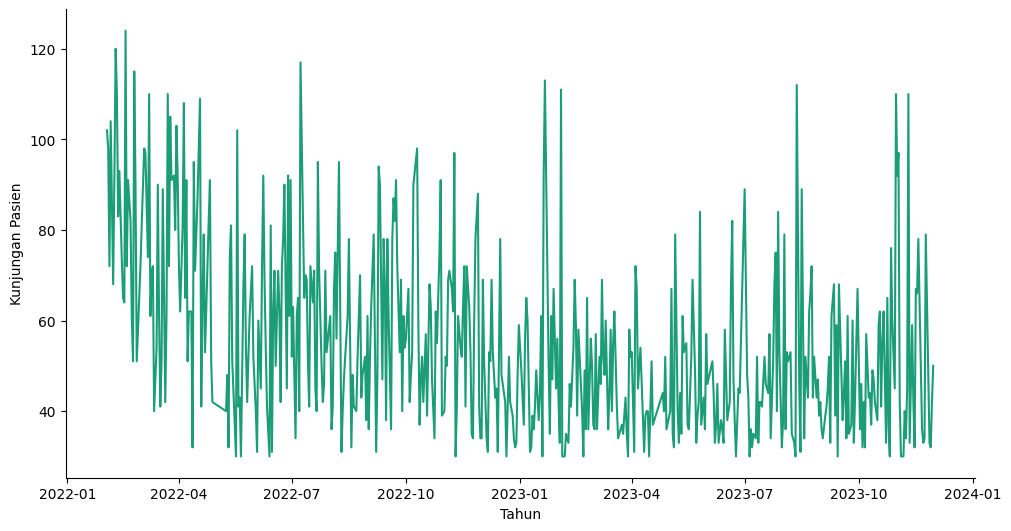

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Kunjungan Pasien']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Kunjungan Pasien')

##Latar Belakang
Puskesmas Kaleke merupakan salah satu fasilitas pelayanan kesehatan tingkat pertama yang memiliki peran penting dalam memberikan layanan kesehatan kepada masyarakat. Salah satu aspek penting dalam pengelolaan pelayanan adalah kemampuan untuk memprediksi jumlah kunjungan pasien rawat jalan. Prediksi ini berguna untuk memastikan sumber daya, seperti tenaga medis, obat-obatan, dan fasilitas, tersedia secara optimal untuk memenuhi kebutuhan pasien.

Dalam penelitian ini, metode **Fuzzy Time Series Chen** digunakan untuk memprediksi jumlah kunjungan pasien rawat jalan pada tahun 2024 berdasarkan data historis yang mencakup variabel tahun dan kunjungan pasien di tahun 2022-2023. Metode ini dipilih karena mampu menangani pola data yang bersifat tidak linier, sehingga cocok untuk memodelkan data kesehatan yang cenderung fluktuatif.

##Tujuan Penelitian
1. Membantu manajemen Puskesmas Kaleke dalam merencanakan kebutuhan sumber daya berdasarkan prediksi kunjungan pasien.
2. Mengidentifikasi pola atau tren kunjungan pasien rawat jalan secara harian untuk tahun 2024.
3. Memberikan solusi prediksi yang akurat dengan menggunakan metode Fuzzy Time Series Chen, yang mampu mengakomodasi pola data dengan ketidakpastian.

##Manfaat Penelitian
1. Pengelolaan Sumber Daya: Prediksi kunjungan pasien dapat membantu alokasi sumber daya secara efisien, termasuk jadwal tenaga medis, persediaan obat-obatan, dan pemeliharaan fasilitas.
2. Pengambilan Keputusan: Memberikan data yang terukur untuk mendukung pengambilan keputusan strategis oleh pihak manajemen Puskesmas.
3. Efisiensi Layanan: Memastikan pelayanan kesehatan yang lebih baik kepada masyarakat dengan meminimalkan waktu tunggu pasien dan mencegah kekurangan atau kelebihan sumber daya.

##Lingkup Penelitian
Studi kasus ini berfokus pada Puskesmas Kaleke dengan menggunakan data historis kunjungan pasien rawat jalan dari tahun sebelumnya. Penelitian ini akan membangun model prediksi untuk tahun 2024 dengan mempertimbangkan variabel tahun sebagai pengidentifikasi waktu dan kunjungan pasien sebagai target prediksi.

##Metode yang Digunakan
Metode Fuzzy Time Series Chen dipilih karena keunggulannya dalam memprediksi data dengan karakteristik fluktuasi yang tidak linier. Proses analisis melibatkan tahapan berikut:
1. Pengumpulan dan analisis data historis kunjungan pasien.
2. Penentuan himpunan fuzzy dan aturan relasi.
3. Penerapan model Fuzzy Time Series Chen untuk menghasilkan prediksi kunjungan pasien.
4. Evaluasi model menggunakan Mean Absolute Percentage Error (MAPE) untuk mengukur akurasi prediksi.



## Data Preparation


In [ ]:
# Mengecek Tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   No                531 non-null    int64         
 1   Tahun             531 non-null    datetime64[ns]
 2   Kunjungan Pasien  531 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 12.6 KB


In [ ]:
# Mengecek Missing Value
df.isnull().sum()

No                  0
Tahun               0
Kunjungan Pasien    0
dtype: int64

In [ ]:
# Menyiapkan data untuk model
new_df = df[['Tahun', 'Kunjungan Pasien']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tahun             531 non-null    datetime64[ns]
 1   Kunjungan Pasien  531 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.4 KB


In [ ]:
# Mengurutkan Orderdate
new_df['Tahun'].min(), new_df['Tahun'].max()

(Timestamp('2022-02-02 00:00:00'), Timestamp('2023-11-30 00:00:00'))

In [ ]:
# Reset index untuk memastikan indeks konsisten
new_df.reset_index()
new_df

,Tahun,Kunjungan Pasien
0,2022-02-02,102
1,2022-02-03,98
2,2022-02-04,72
3,2022-02-05,104
4,2022-02-07,68
...,...,...
526,2023-11-24,79
527,2023-11-27,33
528,2023-11-28,32
529,2023-11-29,42


In [ ]:
# Set kolom 'Tahun' sebagai indeks
new_df['Tahun'] = pd.to_datetime(new_df['Tahun'])
new_df.set_index('Tahun', inplace=True)

<ipython-input-10-15188e3c0974>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tahun'] = pd.to_datetime(new_df['Tahun'])


In [ ]:
new_df

,Kunjungan Pasien
Tahun,
2022-02-02,102
2022-02-03,98
2022-02-04,72
2022-02-05,104
2022-02-07,68
...,...
2023-11-24,79
2023-11-27,33
2023-11-28,32


In [ ]:
new_df.isnull().sum()

Kunjungan Pasien    0
dtype: int64

In [ ]:
# Resample data dengan frekuensi harian ('D') dan mengisi nilai yang hilang dengan rata-rata bergerak
new_df = new_df.resample('D').mean()
new_df['Kunjungan Pasien'] = new_df['Kunjungan Pasien'].fillna(new_df['Kunjungan Pasien'].rolling(window=7, min_periods=1).mean())

# Mengisi nilai yang masih hilang dengan rata-rata total kolom
new_df['Kunjungan Pasien'] = new_df['Kunjungan Pasien'].fillna(new_df['Kunjungan Pasien'].mean())

# Mengonversi tipe data menjadi int
new_df['Kunjungan Pasien'] = new_df['Kunjungan Pasien'].astype(int)

In [ ]:
new_df.count()
new_df

,Kunjungan Pasien
Tahun,
2022-02-02,102
2022-02-03,98
2022-02-04,72
2022-02-05,104
2022-02-06,94
...,...
2023-11-26,46
2023-11-27,33
2023-11-28,32


In [ ]:
new_df = new_df.reset_index()
new_df = new_df.rename(columns={0:'Kunjungan Pasien'})
new_df.index.name='Tahun'
new_df.set_index('Tahun', inplace=True )

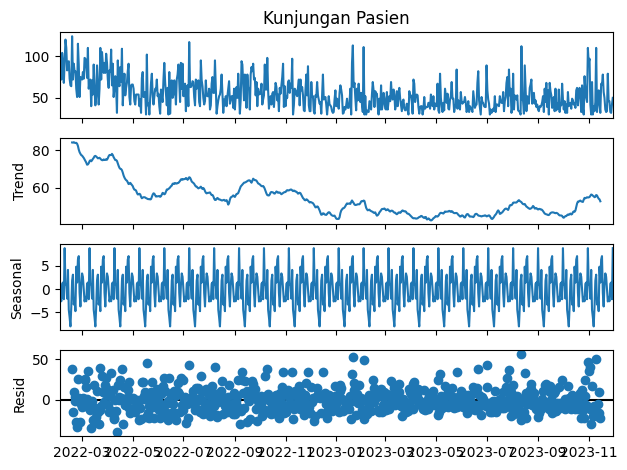

In [ ]:
# Dekomposisi data
result = seasonal_decompose(new_df['Kunjungan Pasien'], model='additive', period=30)
result.plot()
plt.show()

## Modeling Fuzzy Chen

### Menentukan Universe of Discourse

In [ ]:
# Menentukan nilai minimum dan maksimum dari new_data
Dmin = new_df['Kunjungan Pasien'].min()
Dmax = new_df['Kunjungan Pasien'].max()

# Menentukan D1 dan D2 (misalnya 5% dari rentang data)
D1 = 0.08 * (Dmax - Dmin)
D2 = 0.06 * (Dmax - Dmin)

# Menentukan universe of disourse
U = [Dmin - D1, Dmax + D2]
print("Universe of Discourse:", U)

Universe of Discourse: [22.48, 129.64]


### Menentukan Panjang Interval dengan Metode Berbasis Rata-rata

In [ ]:
# Menghitung rata-rata dan simpangan baku dari new_data
mean = new_df['Kunjungan Pasien'].mean()
std_dev = new_df['Kunjungan Pasien'].std()

# Menentukan panjang interval sebagai kelipatan dari simpangan baku
k = 2  # Anda dapat menyesuaikan nilai k sesuai kebutuhan
L = std_dev/k
print("Panjang Interval (L):", L)

# Membagi universe of discourse menjadi interval
intervals = np.arange(U[0], U[1], L)
print("Intervals:", intervals)

Panjang Interval (L): 9.417775365959217
Intervals: [ 22.48        31.89777537  41.31555073  50.7333261   60.15110146
  69.56887683  78.9866522   88.40442756  97.82220293 107.23997829
 116.65775366 126.07552903]


### Mendefinisikan Himpunan Fuzzy dan Fuzzifikasi Data Historis

In [ ]:
# Mendefinisikan himpunan fuzzy
def fuzzify(value, intervals):
    for i in range(len(intervals) - 1):
        if intervals[i] <= value < intervals[i + 1]:
            return f'A{i+1}'
    return f'A{len(intervals)-1}'

# Fuzzifikasi data
new_df['Fuzzy'] = new_df['Kunjungan Pasien'].apply(lambda x: fuzzify(x, intervals))
new_df.head()

,Kunjungan Pasien,Fuzzy
Tahun,,
2022-02-02,102,A9
2022-02-03,98,A9
2022-02-04,72,A6
2022-02-05,104,A9
2022-02-06,94,A8


### Membuat Tabel Fuzzy Logical Relationship (FLR)

In [ ]:
# Membuat tabel FLR
flr = []
for i in range(len(new_df) - 1):
    current_state = new_df['Fuzzy'].iloc[i]
    next_state = new_df['Fuzzy'].iloc[i + 1]
    flr.append((current_state, next_state))

# Mengelompokkan FLR ke dalam grup (FLRG)
flrg = {}
for current_state, next_state in flr:
    if current_state not in flrg:
        flrg[current_state] = []
    flrg[current_state].append(next_state)

# Menampilkan FLRG
for key, value in flrg.items():
    print(f"{key}: {value}")

A9: ['A9', 'A6', 'A8', 'A8', 'A8', 'A8', 'A2', 'A4']
A6: ['A9', 'A5', 'A8', 'A6', 'A6', 'A7', 'A9', 'A10', 'A6', 'A2', 'A4', 'A9', 'A5', 'A5', 'A5', 'A7', 'A4', 'A8', 'A3', 'A5', 'A6', 'A8', 'A5', 'A5', 'A3', 'A5', 'A4', 'A4', 'A4', 'A3', 'A5', 'A5', 'A7', 'A6', 'A4', 'A8', 'A4', 'A2', 'A4', 'A4', 'A3', 'A5', 'A2', 'A3', 'A4', 'A4']
A8: ['A5', 'A11', 'A8', 'A6', 'A7', 'A4', 'A7', 'A5', 'A5', 'A7', 'A7', 'A6', 'A4', 'A6', 'A4', 'A5', 'A5', 'A5', 'A4', 'A6', 'A5', 'A8', 'A5', 'A6', 'A4', 'A2', 'A1', 'A10', 'A4', 'A5', 'A8', 'A3']
A5: ['A8', 'A5', 'A11', 'A4', 'A6', 'A2', 'A3', 'A10', 'A7', 'A8', 'A6', 'A2', 'A7', 'A10', 'A7', 'A5', 'A7', 'A5', 'A5', 'A5', 'A3', 'A7', 'A4', 'A4', 'A1', 'A6', 'A3', 'A3', 'A8', 'A5', 'A2', 'A5', 'A2', 'A5', 'A5', 'A6', 'A4', 'A5', 'A6', 'A3', 'A2', 'A6', 'A1', 'A6', 'A6', 'A2', 'A3', 'A3', 'A2', 'A5', 'A2', 'A2', 'A4', 'A3', 'A5', 'A3', 'A4', 'A6', 'A2', 'A6', 'A5', 'A8', 'A4', 'A6', 'A4', 'A4', 'A4', 'A4', 'A1', 'A5', 'A3', 'A3', 'A4', 'A4', 'A2', 'A4', 'A

## Prediksi Kunjungan Pasien

In [ ]:
# Fungsi untuk fuzzifikasi
def fuzzify(value, intervals):
    for i in range(len(intervals) - 1):
        if intervals[i] <= value < intervals[i + 1]:
            return f'A{i+1}'
    return f'A{len(intervals)-1}'

# Fungsi untuk defuzzifikasi
def defuzzify(fuzzy_set, intervals):
    index = int(fuzzy_set[1:]) - 1
    return (intervals[index] + intervals[index + 1]) / 2


In [ ]:
# Fungsi untuk prediksi menggunakan fuzzy time series
def fuzzy_predict(data, intervals, flrg):
    predictions = []
    for i in range(len(data)):
        current_state = fuzzify(data['Kunjungan Pasien'].iloc[i], intervals)
        if current_state in flrg:
            next_states = flrg[current_state]
            next_state = max(set(next_states), key=next_states.count)
            prediction = defuzzify(next_state, intervals)
        else:
            prediction = data['Kunjungan Pasien'].mean()
        predictions.append(prediction)
    return predictions

### Membagi Data Menjadi Data Train dan Test

In [ ]:
# Pisahkan data menjadi data pelatihan dan pengujian
train_size = int(len(new_df) * 0.8)
train, test = new_df[:train_size], new_df[train_size:]

### Menghitung MAPE

MAPE untuk data pelatihan: 19.06%
MAPE untuk data pengujian: 17.53%


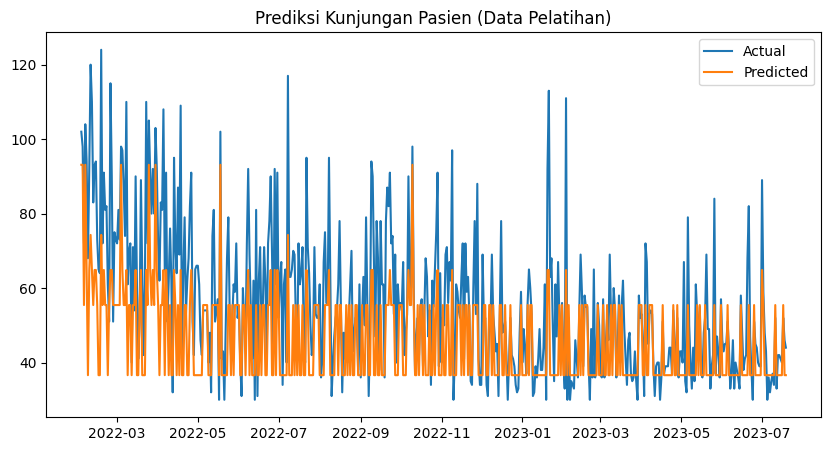

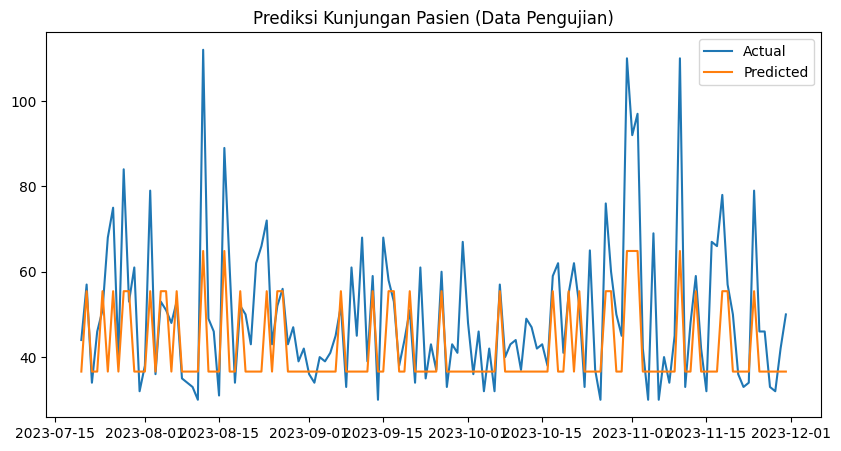

In [ ]:
# Lakukan prediksi untuk seluruh data pelatihan
predictions_train = fuzzy_predict(train, intervals, flrg)

# Lakukan prediksi untuk seluruh data pengujian
predictions_test = fuzzy_predict(test, intervals, flrg)

# Fungsi untuk menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Menghitung MAPE untuk data pelatihan
train_mape = calculate_mape(train['Kunjungan Pasien'], predictions_train)
print(f'MAPE untuk data pelatihan: {train_mape:.2f}%')

# Menghitung MAPE untuk data pengujian
test_mape = calculate_mape(test['Kunjungan Pasien'], predictions_test)
print(f'MAPE untuk data pengujian: {test_mape:.2f}%')

# Plot hasil prediksi dan data asli untuk data pelatihan
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Kunjungan Pasien'], label='Actual')
plt.plot(train.index, predictions_train, label='Predicted')
plt.title('Prediksi Kunjungan Pasien (Data Pelatihan)')
plt.legend()
plt.show()

# Plot hasil prediksi dan data asli untuk data pengujian
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['Kunjungan Pasien'], label='Actual')
plt.plot(test.index, predictions_test, label='Predicted')
plt.title('Prediksi Kunjungan Pasien (Data Pengujian)')
plt.legend()
plt.show()

### Prediksi Kunjungan Pasien Tahun 2024

            Prediksi Kunjungan Pasien
2024-01-01                         93
2024-01-02                         93
2024-01-03                         93
2024-01-04                         93
2024-01-05                         93
...                               ...
2024-12-27                         65
2024-12-28                         65
2024-12-29                         65
2024-12-30                         65
2024-12-31                         65

[366 rows x 1 columns]


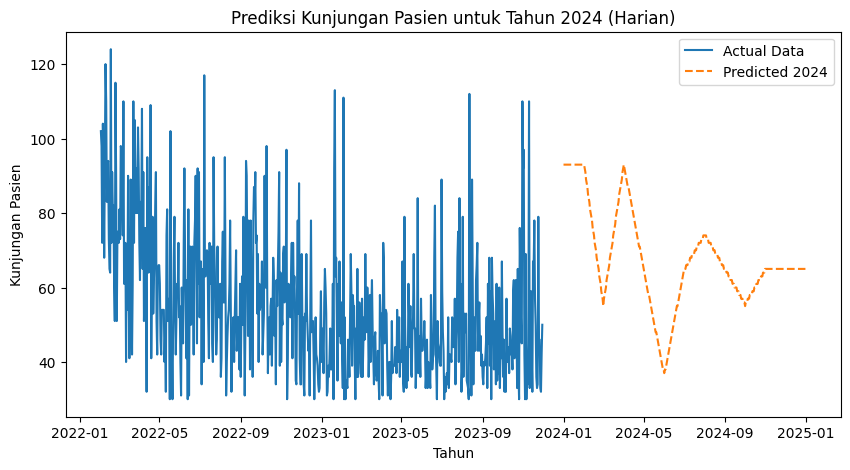

In [ ]:
# Lakukan prediksi untuk tahun 2024
months_to_predict = 12  # Jumlah bulan yang akan diprediksi
# Lakukan prediksi untuk tahun 2024
predictions_2024 = fuzzy_predict(train, intervals, flrg)[:months_to_predict]


# ... (rest of your code remains unchanged)

# Buat tanggal untuk tahun 2024
dates_2024_monthly = pd.date_range(start='2024-01-01', periods=months_to_predict, freq='MS')

# Buat DataFrame untuk hasil prediksi bulanan
df_2024_monthly = pd.DataFrame({'Tahun': dates_2024_monthly, 'Prediksi Kunjungan Pasien': predictions_2024})

# Ubah prediksi bulanan menjadi harian menggunakan interpolasi linear
# Buat rentang tanggal harian untuk tahun 2024
dates_2024_daily = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Buat DataFrame dengan rentang tanggal harian
df_2024_daily = pd.DataFrame(index=dates_2024_daily)

# Gabungkan prediksi bulanan ke dalam DataFrame harian
df_2024_daily = df_2024_daily.join(df_2024_monthly.set_index('Tahun'))

# Lakukan interpolasi linear untuk mengisi nilai harian
df_2024_daily['Prediksi Kunjungan Pasien'] = df_2024_daily['Prediksi Kunjungan Pasien'].interpolate()

# Membulatkan hasil prediksi ke angka bulat terdekat
df_2024_daily['Prediksi Kunjungan Pasien'] = df_2024_daily['Prediksi Kunjungan Pasien'].round().astype(int)

# Menampilkan hasil prediksi harian
print(df_2024_daily)
new_df_combined = pd.concat([new_df, df_2024_daily])

# Plot hasil prediksi dan data asli
plt.figure(figsize=(10, 5))
plt.plot(new_df_combined.index, new_df_combined['Kunjungan Pasien'], label='Actual Data')
plt.plot(new_df_combined.index, new_df_combined['Prediksi Kunjungan Pasien'], label='Predicted 2024', linestyle='--')
plt.legend()
plt.xlabel('Tahun')
plt.ylabel('Kunjungan Pasien')
plt.title('Prediksi Kunjungan Pasien untuk Tahun 2024 (Harian)')
plt.show()

In [ ]:
# Buat DataFrame dari hasil prediksi harian
df_prediksi_2024 = df_2024_daily[['Prediksi Kunjungan Pasien']].copy()
df_prediksi_2024.columns = ['Prediksi Kunjungan Pasien']
df_prediksi_2024.index.name = 'Tahun'

# Tampilkan DataFrame hasil prediksi harian untuk tahun 2024
print(df_prediksi_2024)

            Prediksi Kunjungan Pasien
Tahun                                
2024-01-01                         93
2024-01-02                         93
2024-01-03                         93
2024-01-04                         93
2024-01-05                         93
...                               ...
2024-12-27                         65
2024-12-28                         65
2024-12-29                         65
2024-12-30                         65
2024-12-31                         65

[366 rows x 1 columns]


In [ ]:
# Format kolom index tanggal untuk hanya menampilkan tanggal tanpa waktu
df_prediksi_2024.index = df_prediksi_2024.index.strftime('%Y-%m-%d')

# Simpan DataFrame hasil prediksi ke file Excel tanpa bagian waktu
df_prediksi_2024.to_excel('/content/drive/MyDrive/prediksi_kunjungan_pasien_2024.xlsx')

# Tampilkan DataFrame untuk memastikan isinya
df_prediksi_2024


,Prediksi Kunjungan Pasien
Tahun,
2024-01-01,93
2024-01-02,93
2024-01-03,93
2024-01-04,93
2024-01-05,93
...,...
2024-12-27,65
2024-12-28,65
2024-12-29,65


In [ ]:
from google.colab import files

# Simpan DataFrame hasil prediksi ke file Excel
df_prediksi_2024.to_excel('prediksi_kunjungan_pasien_2024.xlsx')

# Download file
files.download('prediksi_kunjungan_pasien_2024.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>